In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.pylab as pie
%matplotlib inline
plt.rcParams["figure.figsize"] = (20,3)
root="C:/Users/User/Documents/upxproject/"
#root="/Users/jasontam/Documents/Upx/Fundamental_Projects/attachment_Project_5_Facebook_data/Project_5_Facebook data/"
fbdata = pd.read_table(root+"pseudo_facebook.tsv")
fbdata.head()

,userid,age,dob_day,dob_year,dob_month,gender,tenure,friend_count,friendships_initiated,likes,likes_received,mobile_likes,mobile_likes_received,www_likes,www_likes_received
0,2094382,14,19,1999,11,male,266.0,0,0,0,0,0,0,0,0
1,1192601,14,2,1999,11,female,6.0,0,0,0,0,0,0,0,0
2,2083884,14,16,1999,11,male,13.0,0,0,0,0,0,0,0,0
3,1203168,14,25,1999,12,female,93.0,0,0,0,0,0,0,0,0
4,1733186,14,4,1999,12,male,82.0,0,0,0,0,0,0,0,0


In [55]:
#friends count
user_count = fbdata.filter(['userid','friend_count','gender'],axis=1)
user_count.sort_values(['friend_count'],axis=0,ascending=False)[0:10]

,userid,friend_count,gender
98159,2090699,4923,female
98026,1660276,4917,male
98184,1926655,4863,female
98797,1685573,4845,male
98087,1386477,4844,male
98656,1604095,4826,female
98773,2042824,4817,male
98439,1529639,4803,female
98046,1587911,4797,female
98567,1205425,4794,female


In [56]:
#Female members have on an avg 245 friends and male members have on an avg 169 friends
active_users = fbdata[fbdata.friend_count>0]
active_users.groupby('gender').friend_count.agg(['std','mean','min','max','count'])

,std,mean,min,max,count
gender,,,,,
female,478.258298,245.031773,1,4923,39751
male,311.236245,169.251283,1,4917,57115


In [57]:
#Oldest users
print("Top ten oldest users")
fbdata.sort_values(['tenure'],axis=0,ascending=False)[0:10]

Top ten oldest users


,userid,age,dob_day,dob_year,dob_month,gender,tenure,friend_count,friendships_initiated,likes,likes_received,mobile_likes,mobile_likes_received,www_likes,www_likes_received
97177,2135122,108,17,1905,6,male,3139.0,1343,167,18,14,0,12,18,2
96429,1601778,100,16,1913,1,male,3139.0,1069,373,137,63,45,35,92,28
86383,1419799,111,1,1902,2,male,3139.0,372,40,11,21,2,13,9,8
93775,2137369,108,4,1905,10,female,3129.0,720,282,421,439,176,296,245,143
98689,2111567,103,22,1910,5,female,3128.0,4658,972,929,2756,929,1193,0,1563
96535,1934957,108,16,1905,10,female,3101.0,1164,497,248,281,121,156,127,125
96672,2032933,102,11,1911,11,female,3019.0,1041,678,518,725,307,609,211,116
66898,2171167,108,15,1905,3,female,2958.0,151,66,73,26,60,20,13,6
89400,1701874,106,18,1907,11,female,2926.0,456,209,19,12,0,7,19,5
88567,1574331,108,14,1905,4,male,2888.0,430,183,54,103,54,93,0,10


In [58]:
#Account with no friends and no friend request initiated
inactive_acc=fbdata[(fbdata.friend_count<=0) & (fbdata.friendships_initiated<=0) & (fbdata.tenure>30)]

inactive_count = inactive_acc.userid.count()
print("Total number of inactive accounts  "+str(inactive_count))

inactive_perc = 100* float(inactive_count)/ float(fbdata.userid.count())
print("Percentage ratio of inactive accounts "+str(inactive_perc))

#Top inactive users
print("Accounts which are inactive since very long")
print(inactive_acc.filter(['userid','tenure','gender']).sort_values(['tenure'],axis=0,ascending=False)[1:10])

Total number of inactive accounts  1446
Percentage ratio of inactive accounts 1.4605618011575408
Accounts which are inactive since very long
       userid  tenure  gender
1652  1885929  1846.0    male
311   2015792  1610.0    male
1331  1681210  1523.0    male
356   1156825  1486.0  female
1794  1186779  1438.0    male
1448  1371557  1421.0  female
1682  1952159  1389.0    male
1346  1081551  1368.0    male
1005  1151168  1354.0    male


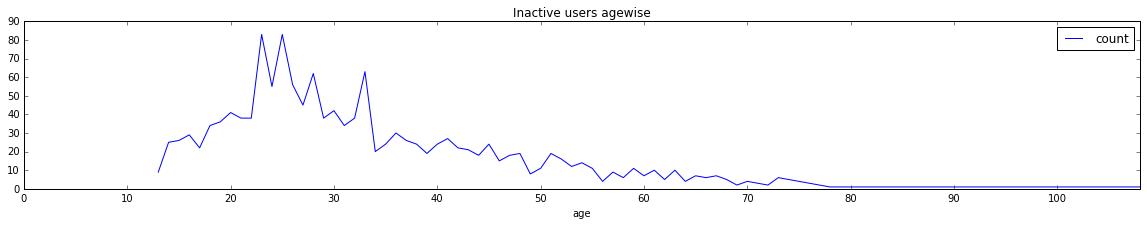

In [59]:
#Non active users agewise.
inactive_age_count = inactive_acc.groupby(['age']).agg(['count'])
inactive_age_count['userid'].plot(title="Inactive users agewise",xticks=range(0,110,10))

array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000021B75B2E0F0>], dtype=object)

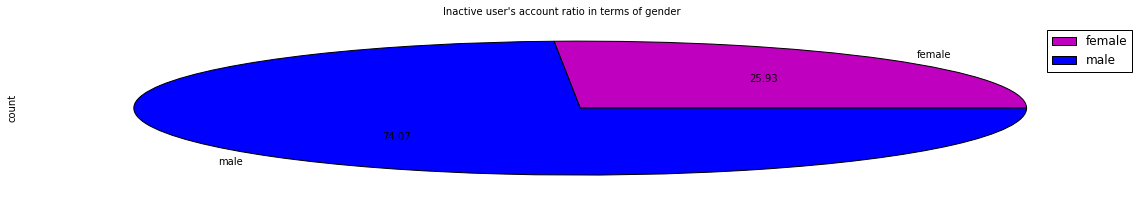

In [60]:
#Male to Female ratio of inactive users
mf_ratio = inactive_acc.groupby(['gender']).userid.agg(['count'])
mf_ratio.plot.pie(subplots=True,autopct='%.2f',title="Inactive user's account ratio in terms of gender",colors=['m','b'])

In [61]:
#Active accounts
active_acc=fbdata[(fbdata.friend_count>0) & (fbdata.friendships_initiated>0)]
active_acc.head(5)


,userid,age,dob_day,dob_year,dob_month,gender,tenure,friend_count,friendships_initiated,likes,likes_received,mobile_likes,mobile_likes_received,www_likes,www_likes_received
1962,1295206,14,15,1999,12,female,126.0,1,1,0,0,0,0,0,0
1963,1549189,14,20,1999,12,female,95.0,1,1,0,0,0,0,0,0
1964,1102182,14,10,1999,12,female,2.0,1,1,0,0,0,0,0,0
1965,1433884,13,15,2000,1,male,199.0,1,1,0,0,0,0,0,0
1968,1430781,13,1,2000,1,male,232.0,1,1,0,0,0,0,0,0


In [62]:
active_count = active_acc.userid.count()
print("Total number of active accounts  "+str(active_count))

active_perc = 100* float(active_count)/ float(fbdata.userid.count())
print("Percentage ratio of inactive accounts "+str(active_perc))

Total number of active accounts  96006
Percentage ratio of inactive accounts 96.97281900548468


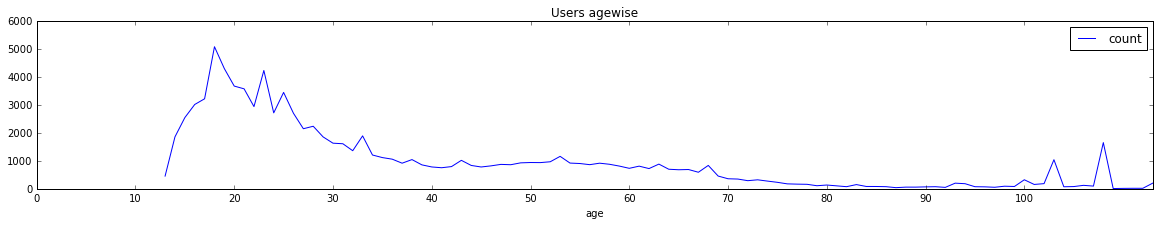

In [63]:
#Active users agewise.
aggregated = active_acc.groupby(['age']).userid.agg(['count'])
aggregated.plot(title="Users agewise",xticks=range(0,110,10))

array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000021B79555F60>], dtype=object)

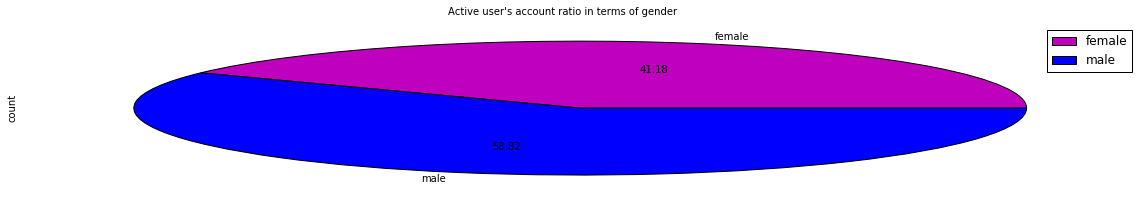

In [64]:
#Male to Female ratio of inactive users
mf_ratio = active_acc.groupby(['gender']).userid.agg(['count'])
mf_ratio.plot.pie(subplots=True,autopct='%.2f',title="Active user's account ratio in terms of gender",colors=['m','b'])

In [65]:
#Most liked users
print("Top ten users whose posts are most liked")
fbdata.sort_values(['likes_received'],axis=0,ascending=False)[1:10]

Top ten users whose posts are most liked


,userid,age,dob_day,dob_year,dob_month,gender,tenure,friend_count,friendships_initiated,likes,likes_received,mobile_likes,mobile_likes_received,www_likes,www_likes_received
77121,1441676,20,5,1993,8,female,253.0,230,73,2078,178166,1982,138561,96,39605
98822,1715925,23,4,1990,9,female,705.0,4077,793,1877,152014,80,89911,1797,62103
98994,2063006,20,4,1993,1,female,402.0,1988,332,7351,106025,7248,73333,103,32692
98878,1053087,23,6,1990,6,male,596.0,4320,836,2996,82623,179,43410,2817,39213
49230,1432020,20,12,1993,1,male,245.0,79,50,477,53534,78,30387,399,23147
98773,2042824,18,25,1995,1,male,51.0,4817,32,1346,52964,1342,18925,4,34039
98937,1559908,20,4,1993,12,female,1334.0,4622,1819,4280,45633,472,30754,3808,14879
98936,1781243,17,1,1996,5,female,976.0,3683,755,10478,42449,246,27353,10232,15096
98686,1015907,74,27,1939,11,male,832.0,4630,831,966,39536,941,10199,25,29337


1. FB users aged below 20 receive more likes than they like things
2. FB users aged byeond 20 and below 90 likes more things as compare to likes received by them
3. Posts by FB users aged below 20 and aged above 90 are more liked as compare to posts by users in other agre groups


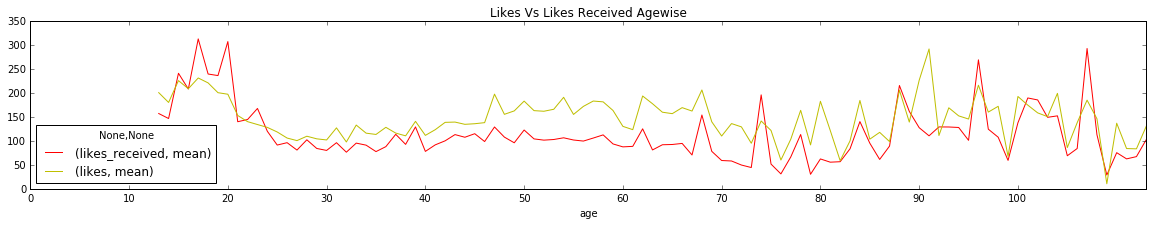

In [66]:
#Average likes recieved based on age
age_mean = fbdata.groupby(['age']).agg(['mean'])
print("1. FB users aged below 20 receive more likes than they like things")
print("2. FB users aged byeond 20 and below 90 likes more things as compare to likes received by them")
print("3. Posts by FB users aged below 20 and aged above 90 are more liked as compare to posts by users in other agre groups")
age_mean[['likes_received','likes']].plot(title="Likes Vs Likes Received Agewise",xticks=range(0,110,10),color=['r','y'])

Across ages people access FB mobile app more than the online site 


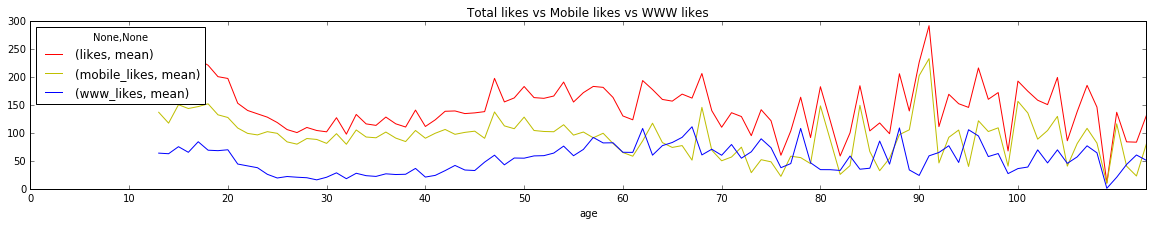

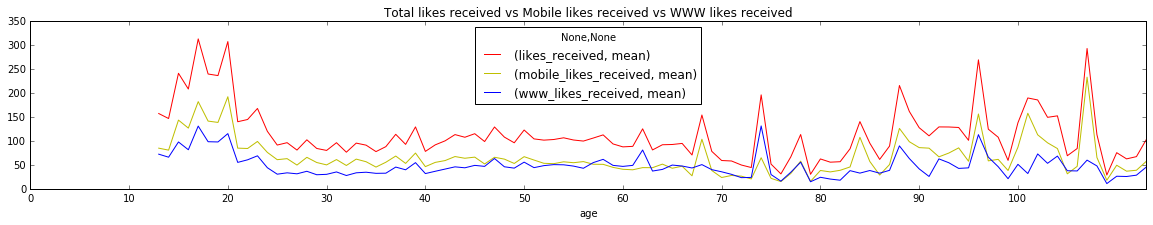

In [67]:
print("Across ages people access FB mobile app more than the online site ")
age_mean[['likes','mobile_likes','www_likes']].plot(title="Total likes vs Mobile likes vs WWW likes",xticks=range(0,110,10),color=['r','y','b'])

age_mean[['likes_received','mobile_likes_received','www_likes_received']].plot(title="Total likes received vs Mobile likes received vs WWW likes received",xticks=range(0,110,10),color=['r','y','b'])

1. Females likes more things compare to males
1. Females receive more likes on their post compare to males
1. Females receive more likes on their post compare to males


array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000021B00016198>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x0000021B00064048>], dtype=object)

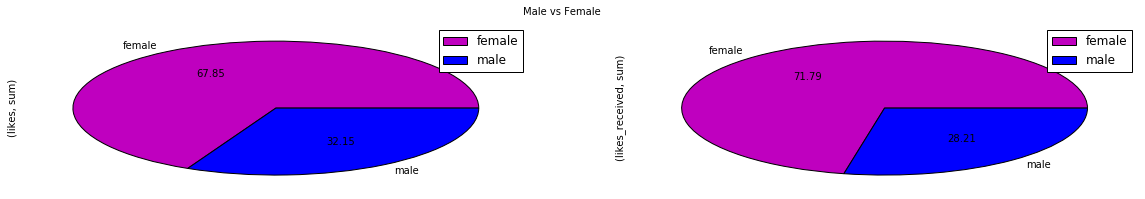

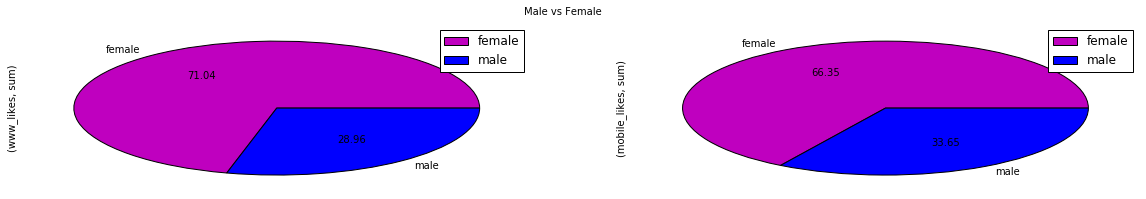

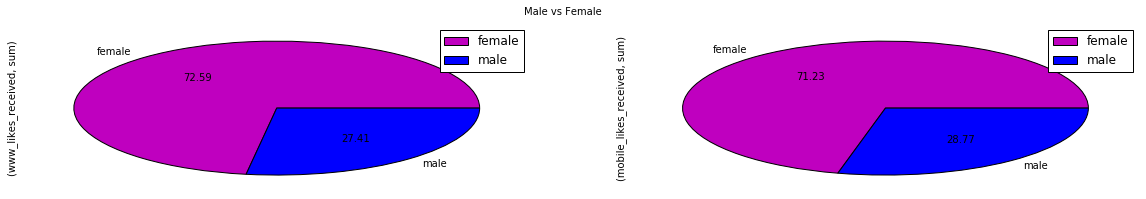

In [68]:
gender_sum = fbdata.groupby(['gender']).agg(['sum'])
#print(gender_sum)
print("1. Females likes more things compare to males")
print("1. Females receive more likes on their post compare to males")
print("1. Females receive more likes on their post compare to males")
gender_sum[['likes','likes_received']].plot.pie(subplots=True,autopct='%.2f',title="Male vs Female",colors=['m','b'])
gender_sum[['www_likes','mobile_likes']].plot.pie(subplots=True,autopct='%.2f',title="Male vs Female",colors=['m','b'])
gender_sum[['www_likes_received','mobile_likes_received']].plot.pie(subplots=True,autopct='%.2f',title="Male vs Female",colors=['m','b'])

In [6]:
#Aries (March 21-April 19)
#Taurus (April 20-May 20)
#Gemini May 21-June 20)
#Cancer (June 21-July 22)
#Leo (July 23-August 22)
#Virgo (August 23-September 22)
#Libra (September 23-October 22)
#Scorpio (October 23-November 21)
#Sagittarius (November 22-December 21)
#Capricorn (December 22-January 19)
#Aquarius (January 20 to February 18)
#Pisces (February 19 to March 20)
def sunsign(month,day):
    #print(day)
    #print(month)
    zodiac_sign = ""
    if ((int(month)==12 and int(day) >= 22)or(int(month)==1 and int(day)<= 19)):
        zodiac_sign = ("Capricorn")
    elif ((int(month)==1 and int(day) >= 20)or(int(month)==2 and int(day)<= 17)):
            zodiac_sign = ("Aquarius")
    elif ((int(month)==2 and int(day) >= 18)or(int(month)==3 and int(day)<= 19)):
            zodiac_sign = ("Pices")
    elif ((int(month)==3 and int(day) >= 20)or(int(month)==4 and int(day)<= 19)):
            zodiac_sign = ("Aries")
    elif ((int(month)==4 and int(day) >= 20)or(int(month)==5 and int(day)<= 20)):
            zodiac_sign = ("Taurus")
    elif ((int(month)==5 and int(day) >= 21)or(int(month)==6 and int(day)<= 20)):
            zodiac_sign = ("Gemini")
    elif ((int(month)==6 and int(day) >= 21)or(int(month)==7 and int(day)<= 22)):
            zodiac_sign = ("Cancer")
    elif ((int(month)==7 and int(day) >= 23)or(int(month)==8 and int(day)<= 22)): 
            zodiac_sign = ("Leo")
    elif ((int(month)==8 and int(day) >= 23)or(int(month)==9 and int(day)<= 22)): 
            zodiac_sign = ("Virgo")
    elif ((int(month)==9 and int(day) >= 23)or(int(month)==10 and int(day)<= 22)):
            zodiac_sign = ("Libra")
    elif ((int(month)==10 and int(day) >= 23)or(int(month)==11 and int(day)<= 21)): 
            zodiac_sign = ("Scorpio")
    elif ((int(month)==11 and int(day) >= 22)or(int(month)==12 and int(day)<= 21)):
            zodiac_sign = ("Sagittarius")
    return  zodiac_sign 
print (sunsign(10,3))

Libra


In [7]:
fbdata['Sunsign'] = fbdata[['dob_month', 'dob_day']].apply(lambda x: sunsign(x['dob_month'],x['dob_day']), axis=1)


Capricorn characteristics:Capricorn personality traits. Capricorns are the planners and strategists of the zodiac. They like to plan and rehearse everything in advance and as a result they typically excel at anything they turn their mind to. They tend to be highly practical people who like structure, organization, tradition and stability

 Leo characteristics: Leo Traits. Warm, action-oriented and driven by the desire to be loved and admired, the Leo have an air royalty about them. They love to be in the limelight, which is why many of them make a career in the performing arts. The personality of a Leo is made up of some positive as well as negative traits.

 Gemini characteristics: Gemini traits. Expressive and quick-witted, Gemini represents two different personalities in one and you will never be sure which one you will face. They are sociable, communicative and ready for fun, with a tendency to suddenly get serious, thoughtful and restless.

 Virgo characteristics: Personality trai

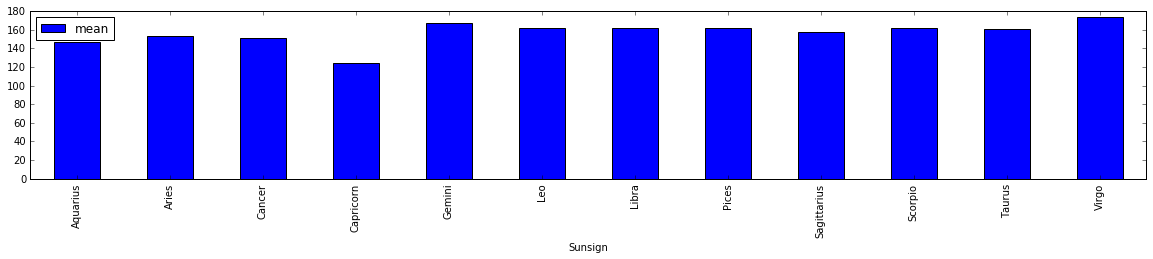

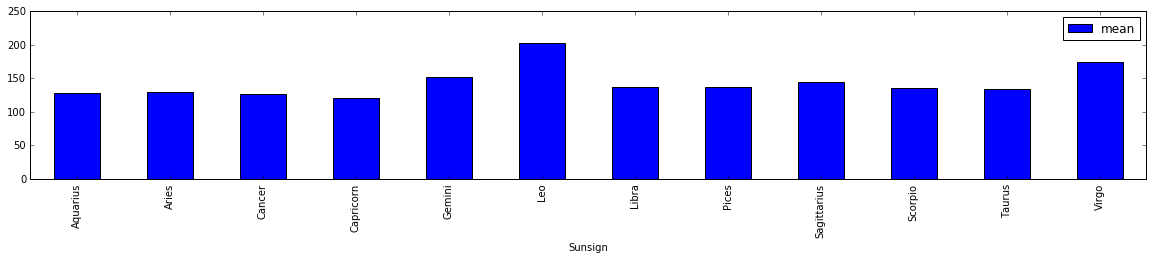

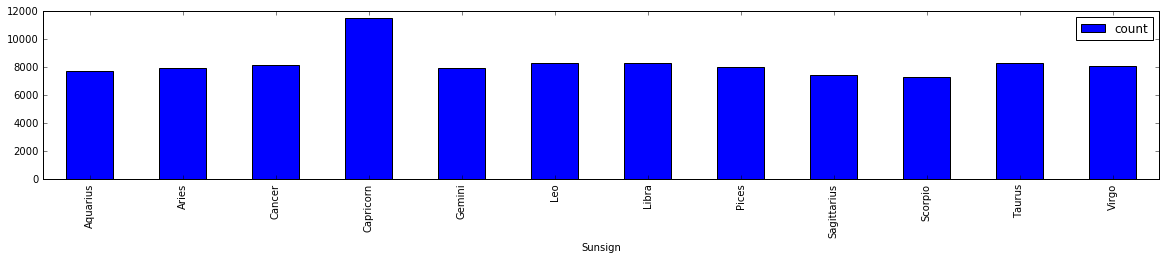

In [96]:
print("Capricorn characteristics:Capricorn personality traits. Capricorns are the planners and strategists of the zodiac. They like to plan and rehearse everything in advance and as a result they typically excel at anything they turn their mind to. They tend to be highly practical people who like structure, organization, tradition and stability")
print("\n Leo characteristics: Leo Traits. Warm, action-oriented and driven by the desire to be loved and admired, the Leo have an air royalty about them. They love to be in the limelight, which is why many of them make a career in the performing arts. The personality of a Leo is made up of some positive as well as negative traits.")
print("\n Gemini characteristics: Gemini traits. Expressive and quick-witted, Gemini represents two different personalities in one and you will never be sure which one you will face. They are sociable, communicative and ready for fun, with a tendency to suddenly get serious, thoughtful and restless.")
print("\n Virgo characteristics: Personality traits. Astrologers ascribe certain personality traits to a person born under the Virgo: people born under this sign are typically analytical, kind, hardworking and practical. According to astrologers, Virgos tend to worry often; they are shy and dislike being the center of attention.")
ss_sum = fbdata.groupby(['Sunsign']).agg(['mean','count'])
print("\n Virgo people likes more things as compare to other sun-signs")
ss_sum['likes'][['mean']].plot(kind='bar')
print("\n People with sunsign as Leo gets more like as compare to people from other sunsign")
ss_sum['likes_received'][['mean']].plot(kind='bar')
print("\n There are more Capricon people on FB")
ss_sum['userid'][['count']].plot(kind='bar')


In [2]:
#Chinese Zodiac
#Rat: 2008, 1996, 1984, 1972, 1960 : year_of_birth % 12 = 4
#Ox: 2009, 1997, 1985, 1973, 1961 : year_of_birth % 12 = 5
#Tiger: 2010, 1998, 1986, 1974, 1962 : year_of_birth % 12 = 6
#Rabbit: 2011, 1999, 1987, 1975, 1963 : year_of_birth % 12 = 7
#Dragon: 2012, 2000, 1988, 1976, 1964 : year_of_birth % 12 = 8
#Snake: 2013, 2001, 1989, 1977, 1965 : year_of_birth % 12 = 9
#Horse: 2014, 2002, 1990, 1978, 1966 : year_of_birth % 12 = 10
#Goat: 2015, 2003, 1991, 1979, 1967 : year_of_birth % 12 = 11
#Monkey: 2016, 2004, 1992, 1980, 1968 : year_of_birth % 12 = 0
#Rooster: 2017, 2005, 1993, 1981, 1969 : year_of_birth % 12 = 1
#Dog: 2018, 2006, 1994, 1982, 1970 : year_of_birth % 12 = 2
#Pig: 2019, 2007, 1995, 1983, 1971 : year_of_birth % 12 = 3
def chineseZodiacSign(yearOfBirth):
    #print(yearOfBirth)
    chi_zodiac_sign = ""
    remainder = int(yearOfBirth) % 12
    #print(remainder)
    if (remainder == 4):
        chi_zodiac_sign = "Rat"
    elif (remainder == 5):
        chi_zodiac_sign = "Ox"
    elif (remainder == 6):
        chi_zodiac_sign = "Tiger"
    elif (remainder == 7):
        chi_zodiac_sign = "Rabbit"
    elif (remainder == 8):
        chi_zodiac_sign = "Dragon"
    elif (remainder == 9):
        chi_zodiac_sign = "Snake"
    elif (remainder == 10):
        chi_zodiac_sign = "Horse"
    elif (remainder == 11):
        chi_zodiac_sign = "Goat"
    elif (remainder == 0):
        chi_zodiac_sign = "Monkey"
    elif (remainder == 1):
        chi_zodiac_sign = "Rooster"
    elif (remainder == 2):
        chi_zodiac_sign = "Dog"
    elif (remainder == 3):
        chi_zodiac_sign = "Pig"
    return chi_zodiac_sign 
print (chineseZodiacSign(1981))

Rooster


In [11]:
fbdata['Chinese Zodiac Sign'] = fbdata[['dob_year']].apply(lambda x: chineseZodiacSign(x['dob_year']), axis=1)


 People with Chinese Zodiac as 'Pig' likes more things as compare to other Zodiac

 People with Chinese Zodiac as 'Rooster' gets more like as compare to people from other Zodiac

 There are more people with Chinese Zodiac as 'Dog' on FB


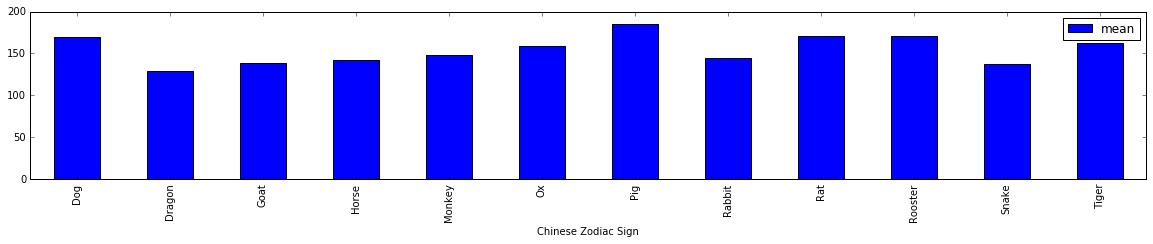

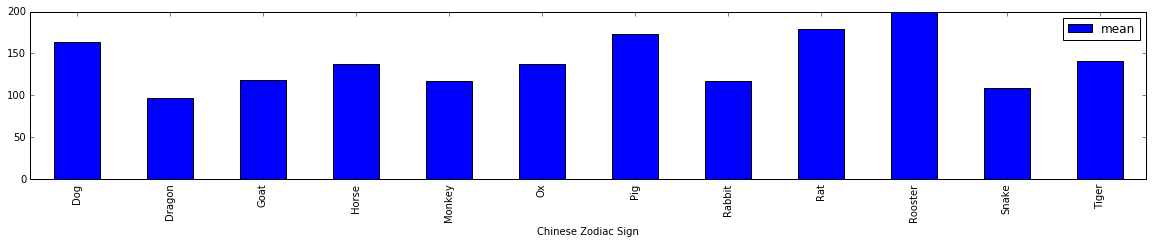

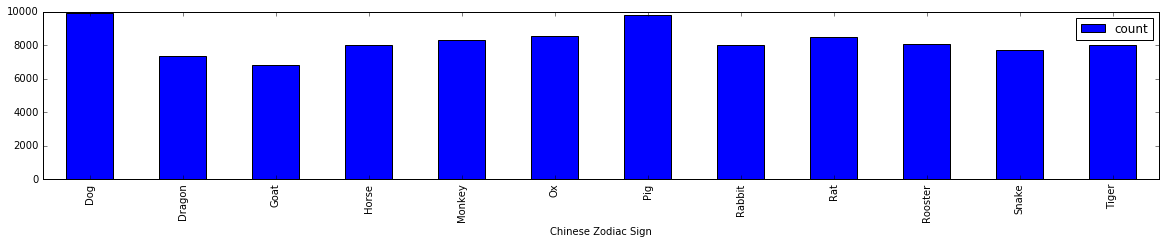

In [12]:
chisign_sum = fbdata.groupby(['Chinese Zodiac Sign']).agg(['mean','count'])
print("\n People with Chinese Zodiac as 'Pig' likes more things as compare to other Zodiac")
chisign_sum['likes'][['mean']].plot(kind='bar')
print("\n People with Chinese Zodiac as 'Rooster' gets more like as compare to people from other Zodiac")
chisign_sum['likes_received'][['mean']].plot(kind='bar')
print("\n There are more people with Chinese Zodiac as 'Dog' on FB")
chisign_sum['userid'][['count']].plot(kind='bar')


 People with the top 30 most likes tends to use mobile than desktop website


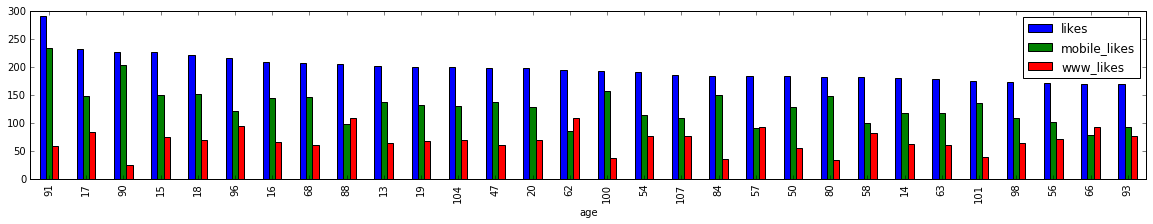

In [13]:
fb_age_mean_like_sorted_top30 = fbdata.groupby("age").mean().sort_values(['likes'], ascending = False).head(30)
fb_age_mean_like_sorted_top30[['likes','mobile_likes','www_likes']].plot(kind='bar')
print("\n People with the top 30 most likes tends to use mobile than desktop website")